<a href="https://colab.research.google.com/github/jdjones91/Coding-Dojo-Machine-Learning-Projects/blob/main/Project_2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# James Jones
###10-05-2022


# Project 2 - Part 2

### Cleaning and exploration of of my data set

In [1]:
# Import Libraries and load data for exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  # These are the only Libraries we need for now

# This data set comes from Kaggle
  - https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset?resource=download

### This data set uses physiological markers to predict the stage of patient cirrhosis

The target (y) is "Stage" (of cirrhosis)

This is a multi-class *Classification* problem

There are 19 Features (X) 

There are 418 rows (Approx 19 * 418 = 7,942 data points)

## I am interested in this data set, because of my background B.S. in Emergency Medical Services. I would very much enjoy working with a healthcare company, hospital system, medical insurance company, etc. to kick off my new career.

In [2]:
# Load in data set and view df.head()
df = pd.read_csv('/content/cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
# There are some modifications tha we need to make to our data set, so let's work with a copy
c_df = df.copy()

In [4]:
# We can drop the ID rown, because it wont provide any useful information
  # We will still have the index column for row location, etc
c_df.drop(columns = 'ID', inplace = True)

In [5]:
# Take a general look at our data set
c_df.info()
  # We have a mix of object and numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [6]:
# We will have a lot of imputing to do
c_df.isna().sum().sum()

1033

In [7]:
# No duplicates
c_df.duplicated().sum()

0

In [9]:
# Take a look at outlier and gather more information
c_df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [26]:
# Age is listed as "Days", making our oldest patient 78 years old. This is normal
   # Get info on our object columns
c_df.dtypes 

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [19]:
c_df['Stage'].value_counts()
# All values are appropriate

3.0    155
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [20]:
# No strange values here
c_df['Sex'].value_counts()

F    374
M     44
Name: Sex, dtype: int64

In [22]:
# All values are appropriate
c_df['Status'].value_counts()

C     232
D     161
CL     25
Name: Status, dtype: int64

In [24]:
# All values are appropriate
c_df['Drug'].value_counts()

D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

In [27]:
# All values are appropriate
c_df['Ascites'].value_counts()

N    288
Y     24
Name: Ascites, dtype: int64

In [28]:
# All values are appropriate
c_df['Hepatomegaly'].value_counts()

Y    160
N    152
Name: Hepatomegaly, dtype: int64

In [29]:
# All values are appropriate
c_df['Spiders'].value_counts()

N    222
Y     90
Name: Spiders, dtype: int64

In [30]:
# All values are appropriate
c_df['Edema'].value_counts()

N    354
S     44
Y     20
Name: Edema, dtype: int64

## All of our missing values can be handled in a preprocessor using imputers

# Below, we will explore our data with visualizations

### Here is a key explaning our Columns

1) ID: unique identifier - (*We dropped this column*)

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

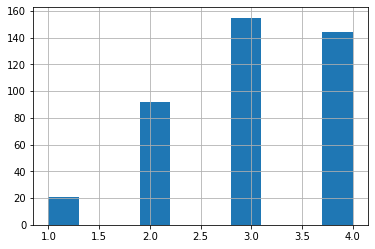

In [32]:
# Lest's visualize some our data to gather more understanding 
c_df["Stage"].hist();
  # We can see here, that of the patients recorded, we primarily see stage 3
  # This shows some imbalance in our target (very small number of stage 1), which may need to be addressed later

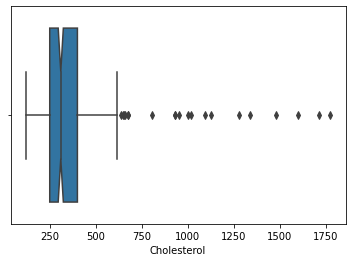

In [40]:
# Let's explore the distribution of our cholesterol levels

sns.boxplot(x = df["Cholesterol"], notch = True);
  # Our cholesterol levels are mostly between ~ 225 - 400

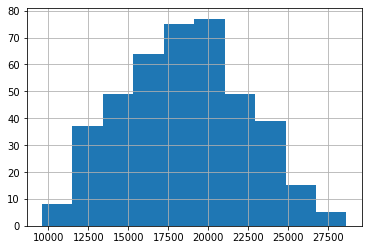

In [42]:
# And a histogram of our age (in days)
c_df["Age"].hist();
  # The age of our patients lies mostly between 15,000 - 22,500 days (41-61 years old)

### I want to add a couple multivariate visuals, because we can!

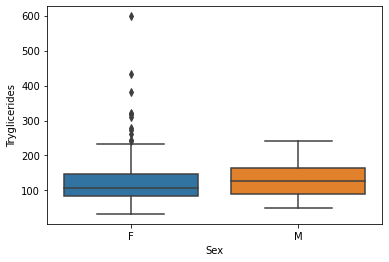

In [44]:
# Look at Sex and Tryglicerides
sns.boxplot(x = 'Sex', y = 'Tryglicerides', data = c_df);
  # This shows tha Males have higher median Trygliceride levels
  # Females have higher Trygliceride outliers 

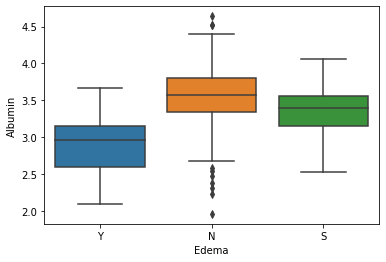

In [45]:
# Lastly, I am interested in seeing a relationship between Edema and Albumin
sns.boxplot(x = 'Edema', y = 'Albumin', data = c_df);
  # We can see that Albumin Levels are highest (Overall + highest Median) in patients with No Edema
  # We can see that Albumin is lowest overall in patients who have Edema dispite diuretic therapy

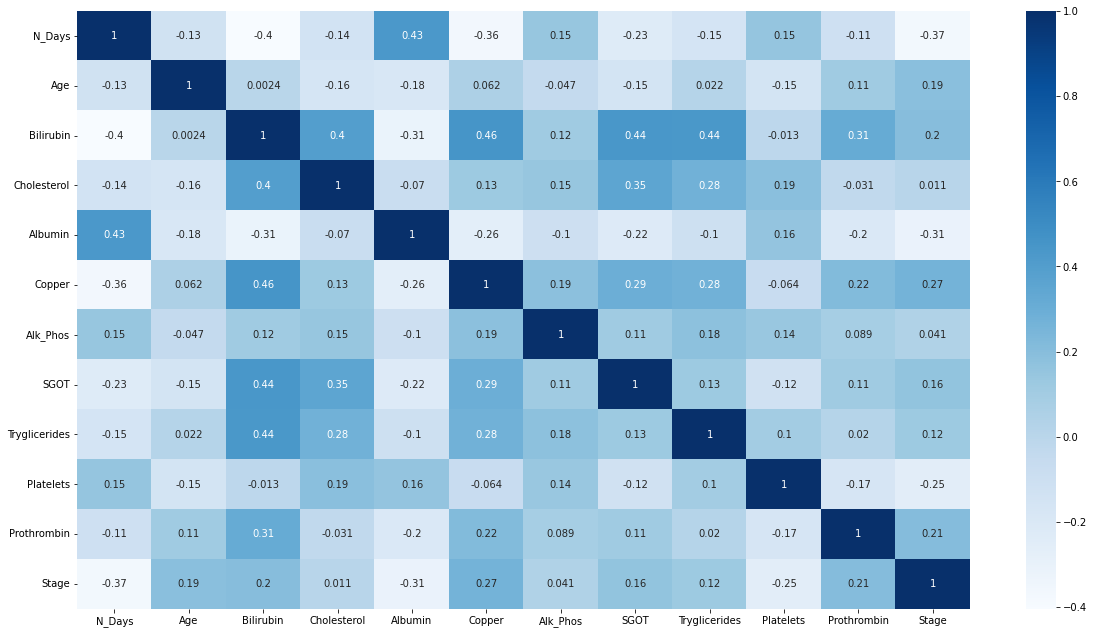

In [48]:
# Lastly, a heatmap, because they can be helpful
corr = c_df.corr()
fig, ax = plt.subplots(figsize=(20,11))
sns.heatmap(corr, cmap = "Blues", annot = True);
  # We do not see any strong correlations with our numerical data
  # In fact, there is not a single correlation >= 0.5

# Pause
### More to come later